# **Sales** **Analysis**

In [3]:
import pandas as pd

# importing dataset from kaggle

In [4]:
df=pd.read_csv('customer_shopping_data.csv')
df.head()

<ipython-input-4-6558ac00a966>:1: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('customer_shopping_data.csv')


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.4,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.6,Cash,24/10/2021,Kanyon


# Lets Check whether the data is clean or not

In [5]:
nan_check=df[df.isna().any(axis=1)]      
nan_check                       #creates a new dataframe nan_check that contains only the rows with missing or NaN values in any rows of the original dataframe df.

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
6,I121056,C151197,Female,NaN,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
16,I336189,C555402,Female,67,Clothing,NaN,600.16,Credit Card,3/6/2022,Kanyon
99458,I232867,C273973,Female,NaN,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


# Drop Rows Of NaN 

In [6]:
df=df.dropna(how='any') #removing data which contain Nan values or missing values
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.4,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.6,Cash,24/10/2021,Kanyon


# Cleaning Dublicate Data

In [7]:
dub_check=df[df['invoice_date'].str[-4:]=='date'] 
dub_check

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
11,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [8]:
df=df[df['invoice_date'].str[-4:]!='date']
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.4,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.6,Cash,24/10/2021,Kanyon


# Add Year Column 

In [9]:
df['Year']=df['invoice_date'].str[-4: ]  #adding year only in the year column
df['Year']=df['Year'].astype('int32')
df.head(2)

<ipython-input-9-0b7bed6fd61d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['invoice_date'].str[-4: ]  #adding year only in the year column
<ipython-input-9-0b7bed6fd61d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['Year'].astype('int32')


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year
0,I138884,C241288,Female,28,Clothing,5,1500.4,Credit Card,5/8/2022,Kanyon,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,2021


# Add Month Column

In [10]:
df['Month']=df['invoice_date'].apply(lambda x: x.split('/')[1]) #sliting date so that we can only generate month
df['Month']=df['Month'].astype('int32')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,Month
0,I138884,C241288,Female,28,Clothing,5,1500.4,Credit Card,5/8/2022,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.6,Cash,24/10/2021,Kanyon,2021,10


# Questions

*   Best Year For Sales? How Much?
*   Finding Out best sales of the month?

*   Shopping Malls Having highest no of sales?
*   What products are most often sold together?



:


#convert columns to the correct type

In [11]:
df['quantity']=pd.to_numeric(df['quantity'])                       #Make int
df['price']=pd.to_numeric(df['price'])                           #Make Float

# Add Sales Column

In [12]:
#as sales = quantity*price, need this, so that we could get the highest sales in a year
df['Sales']=df['quantity']*df['price']
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,Month,Sales
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,2022,8,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,2021,12,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,2021,11,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,2021,5,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,2021,10,242.40


# Finding Out the Highest sales in a year

In [13]:
results=df.groupby('Year').sum()
results

,quantity,price,Month,Sales
Year,,,,
2021,136096,31316304.63,297134,1.145606e+08
2022,137146,31372878.54,296833,1.154372e+08
2023,25469,5862235.10,14092,2.150841e+07


***Plot***

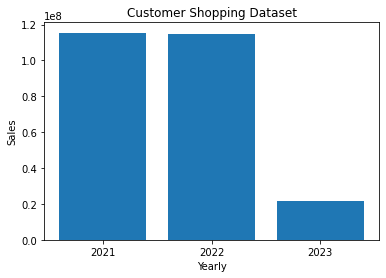

In [14]:
import matplotlib.pyplot as plt

years=df['Year'].unique()

plt.bar(years, results['Sales'])
plt.xticks(years)
plt.xlabel("Yearly")
plt.ylabel("Sales")
plt.title("Customer Shopping Dataset")
plt.show()

***Clearly seen that 2021 and 2022 has almost equal data sales***

# Finding Out best sales of the month

In [15]:
results1=df.groupby('Month').sum()
results1

,quantity,price,Year,Sales
Month,,,,
1,34763,7932626.63,23471467,28891525.59
2,31343,7235297.32,21194825,26625090.10
3,26223,6007305.55,17647195,21956150.67
4,22558,5102478.76,15134990,18715685.98
5,23217,5346926.82,15559486,19719331.10
6,22672,5159745.58,15322977,18932574.98
7,23703,5552166.93,15925332,20379296.07
8,22921,5270542.03,15434247,19282361.29
9,22098,5115214.27,14864096,18795794.91


***Plot***

***Clearly seen that month 1 has the highest data sales, also we can predict that selling product on January can be profitable***

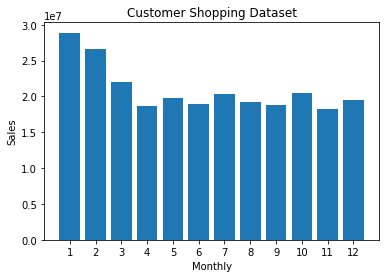

In [16]:
import matplotlib.pyplot as plt

months=[Month for Month, df1 in df.groupby('Month')]

plt.bar(months, results1['Sales'])
plt.xticks(months)
plt.xlabel("Monthly")
plt.ylabel("Sales")
plt.title("Customer Shopping Dataset")
plt.show()

In [17]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,Month,Sales
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,2022,8,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,2021,12,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,2021,11,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,2021,5,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,2021,10,242.40


# Shopping Malls Having highest no of sales

In [18]:
results2=df.groupby('shopping_mall').sum()
results2

,quantity,price,Year,Month,Sales
shopping_mall,,,,,
Cevahir AVM,14951,3434272.00,10091854,30641,12646338.52
Emaar Square Mall,14500,3390393.16,9724028,29686,12406085.14
Forum Istanbul,14852,3336073.82,10000994,30057,12303921.24
Istinye Park,29464,6717036.88,19771582,59574,24618787.02
Kanyon,59455,13710155.08,40072862,121127,50553030.78
Mall of Istanbul,60111,13851702.43,40315413,121700,50872376.11
Metrocity,44898,10250123.43,30348673,92009,37303360.77
Metropol AVM,30530,6937992.99,20541732,62002,25379913.19
Viaport Outlet,14716,3414019.46,9934230,29995,12521339.72


#Plot

***Mall of Istanbul has the highest number of sales***

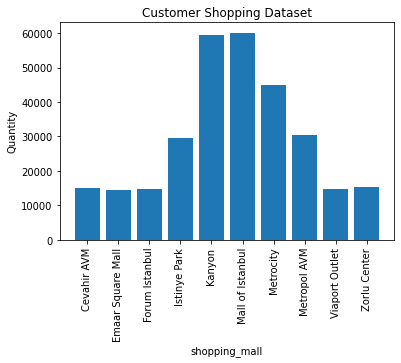

In [19]:
import matplotlib.pyplot as plt

shopping_mall=df['shopping_mall'].unique()
shopping_mall=[shopping_mall for shopping_mall, df1 in df.groupby('shopping_mall') ]
plt.bar(shopping_mall, results2['quantity'])
plt.xticks(shopping_mall, rotation='vertical')
plt.xlabel("shopping_mall")
plt.ylabel("Quantity")
plt.title("Customer Shopping Dataset")
plt.show()

# What products are most often sold together?

**Finding together sold data**

In [20]:
#finding out the dublicate cusstomer id first so that we can identify, they bought the product together
df1=df[df['customer_id'].duplicated(keep=False)]
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,Month,Sales
12,I640510,C225330,Female,67,Shoes,4,143.36,Debit Card,31/07/2022,Metrocity,2022,7,573.44
13,I179803,C312861,Male,25,Clothing,2,600.16,Cash,17/11/2022,Cevahir AVM,2022,11,1200.32
14,I640508,C225330,Female,67,Toys,4,143.36,Debit Card,31/07/2022,Metrocity,2022,7,573.44
15,I179802,C312861,Male,25,Food,2,600.16,Cash,17/11/2022,Cevahir AVM,2022,11,1200.32


**Grouping data**

In [21]:
df1['Grouped']=df.groupby('customer_id')['category'].transform(lambda x: ','.join(x))
df1.head()

<ipython-input-21-7be797a1d3a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped']=df.groupby('customer_id')['category'].transform(lambda x: ','.join(x))


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Year,Month,Sales,Grouped
12,I640510,C225330,Female,67,Shoes,4,143.36,Debit Card,31/07/2022,Metrocity,2022,7,573.44,"Shoes,Toys"
13,I179803,C312861,Male,25,Clothing,2,600.16,Cash,17/11/2022,Cevahir AVM,2022,11,1200.32,"Clothing,Food"
14,I640508,C225330,Female,67,Toys,4,143.36,Debit Card,31/07/2022,Metrocity,2022,7,573.44,"Shoes,Toys"
15,I179802,C312861,Male,25,Food,2,600.16,Cash,17/11/2022,Cevahir AVM,2022,11,1200.32,"Clothing,Food"


**Dropping the repeated data after grouping** 

In [22]:
df1=df1[['customer_id','Grouped']].drop_duplicates()
df1

,customer_id,Grouped
12,C225330,"Shoes,Toys"
13,C312861,"Clothing,Food"


#What product sold the most? why do you think it sold the most?

In [23]:
df.groupby('category').sum()

,quantity,price,Year,Month,Sales
category,,,,,
Books,14981,226962.15,10067820,30162,8.345378e+05
Clothing,103556,31075084.48,69717673,210863,1.139956e+08
Cosmetics,45464,1848566.24,30518679,92385,6.792822e+06
Food,2,600.16,2022,11,1.200320e+03
Food & Beverage,44277,231568.71,29871568,90800,8.495351e+05
Shoes,30221,18135480.25,20287025,61101,6.655402e+07
Souvenir,14868,174401.64,10104114,29890,6.357191e+05
Technology,15021,15772050.00,10100078,30796,5.786235e+07
Toys,30321,1086704.64,20392173,62051,3.980426e+06


**Can clearly see that Clothing was sold most**

***Plot***

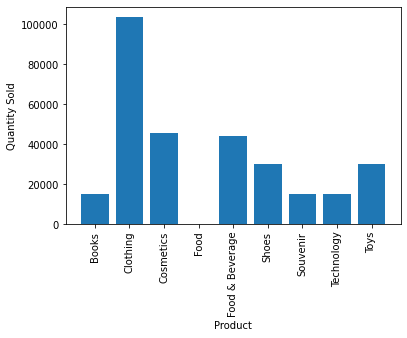

In [32]:
product_group=df.groupby('category')
quantity_ordered=product_group.sum()['quantity']

Product=[product for product, df1 in product_group]
plt.bar(Product, quantity_ordered)
plt.xticks(rotation='vertical')
plt.ylabel('Quantity Sold')
plt.xlabel('Product')
plt.show()

**Mean Prices of each Product**

In [35]:
prices=df.groupby('category').mean()['price']
prices

category
Books                45.574729
Clothing            901.092747
Cosmetics           122.454043
Food                600.160000
Food & Beverage      15.671948
Shoes              1807.222745
Souvenir             34.894286
Technology         3156.935548
Toys                107.733185
Name: price, dtype: float64

***Plot***

<ipython-input-57-2bf1b88b6c5c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Product, rotation='vertical')


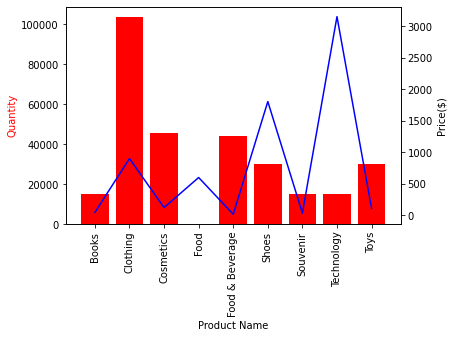

In [57]:
fig, ax1 =plt.subplots()

ax2=ax1.twinx()
ax1.bar(Product, quantity_ordered, color='red')
ax2.plot(Product, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity', color='red')
ax2.set_ylabel('Price($)')
ax1.set_xticklabels(Product, rotation='vertical')
plt.show()


***The product which has high price is sold least whereas the high sold product costs least***